This is an implementation of the 3 qubit bit flip code in Qiskit. This is meant to be an introduction to Qiskit for those who haven't used it before. 

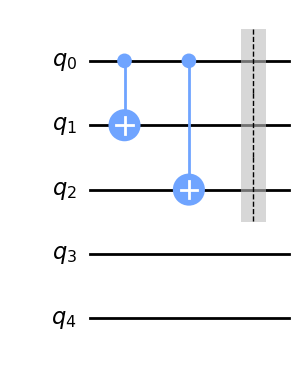

In [85]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import numpy as np
nqubits = 5
qreg_q = QuantumRegister(nqubits) #initialize a quantum register of 5 qubits 3 for encoding and two for measurement
creg_q = ClassicalRegister(2) #initialize a classical register to store the measurements of the two ancilla qubits
encodingcircuit = QuantumCircuit(nqubits) #create a quantum circuit object
encodingcircuit.cnot(0, 1)
encodingcircuit.cnot(0, 2)
encodingcircuit.barrier([0,1,2])
encodingcircuit.draw('mpl')

Next we need to implement a quantum circuit that measures the stabilizers. This corresponds to measuring the $Z_1Z_3$ and $Z_2 Z_3$ stabilizers
which we can do by measuring each individual stabilizer. For the Z operator this corresponds to using a single CNOT. We can then measure the first stabilizer $Z_1Z_3$. For a crude non optimized case, each stabilizer will require one ancilla qubit. Since Qiskit doesn't have the larger controlled multi qubit gates as a type, we will have to define the gate ourselves:

                      ░                     
q_0: ─────■───────■───░─────────────────────
        ┌─┴─┐     │   ░ ┌───┐┌───┐┌───┐     
q_1: ───┤ X ├─────┼───░─┤ H ├┤ X ├┤ H ├─────
        └───┘   ┌─┴─┐ ░ ├───┤└─┬─┘├───┤┌───┐
q_2: ───────────┤ X ├─░─┤ H ├──┼──┤ X ├┤ H ├
     ┌─────────┐└───┘ ░ └───┘  │  └─┬─┘└───┘
q_3: ┤ U2(0,π) ├───────────────┼────┼───────
     ├─────────┤               │    │       
q_4: ┤ U2(0,π) ├───────────────■────■───────
     └─────────┘                            


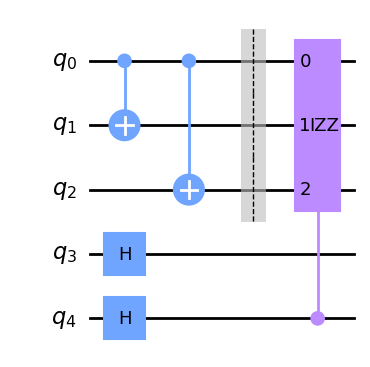

In [86]:
from qiskit.circuit.library import MCMT, ZGate
from qiskit import transpile
encodingcircuit.h(3) # apply hadamard gates to ancilla qubits to allow for unitary measurment
encodingcircuit.h(4)

#measure stabilizer Z1Z3
qcz13 = QuantumCircuit(3)
qcz13.pauli('ZIZ', [0,1,2]) #note the indexing for the qubit index vs pauli string index seems to be flipped
qcz23 = QuantumCircuit(3)
qcz23.pauli('IZZ', [2,1,0])

#stabilizerZ1Z3 = qcz13.to_gate(label='ZIZ').control(1) #convert to a controlled gate type
stabilizerZ2Z3 = qcz23.to_gate(label='IZZ').control(1)
#encodingcircuit.append(stabilizerZ1Z3, [3,0,1,2]) #note the Qu 
encodingcircuit.append(stabilizerZ2Z3, [4,0,1,2])
print(encodingcircuit.decompose())
encodingcircuit.draw('mpl')
